<a href="https://colab.research.google.com/github/VSettipalli/CODSOFT/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
fdimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing Dtaset

In [7]:
df = pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Aim:- Sales Prediction involves the amount of a product that customers will purchase, taking into account, various factors such as advertising expenditure, target audience segmentation, and advertising platform selection

Given dataset consistsof advertising platform and the related sales. Each platform will be visualized

In [8]:
df.shape

(200, 4)

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Observation



/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


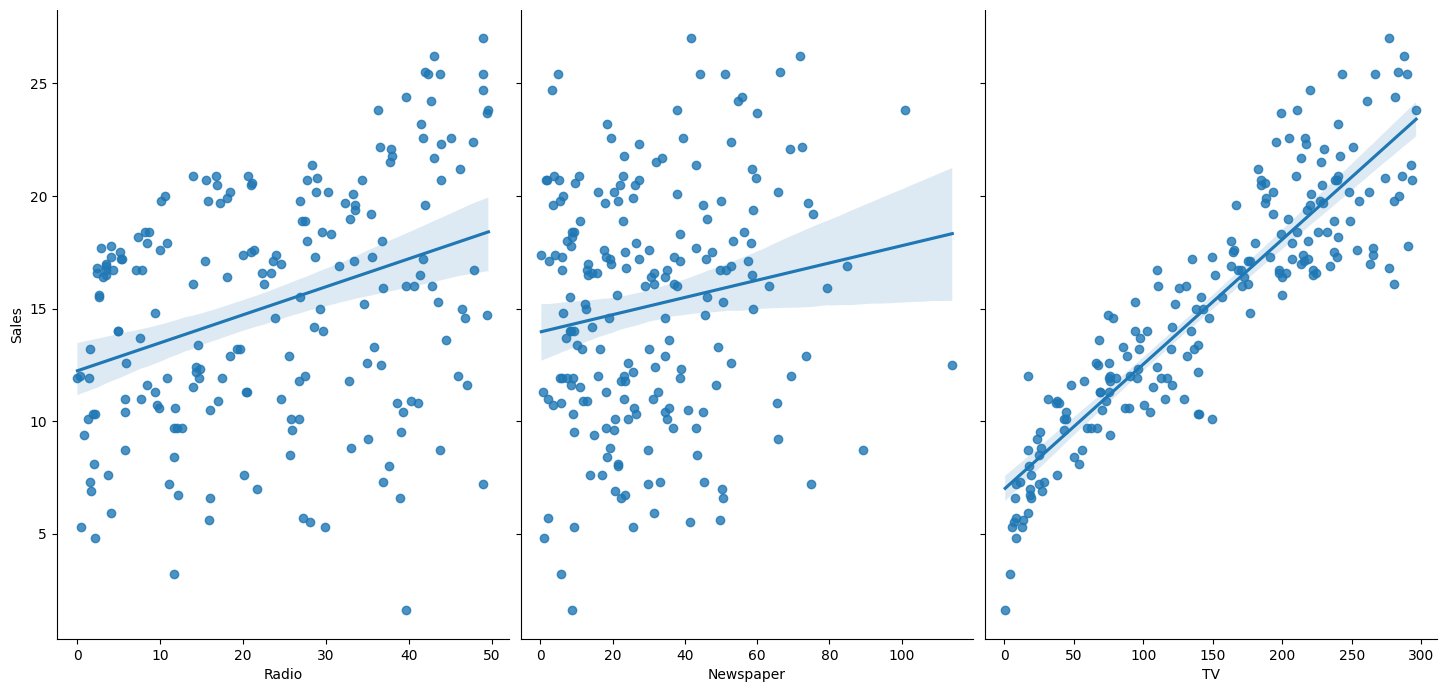

In [12]:
sns.pairplot(df, x_vars=['Radio', 'Newspaper', 'TV'], y_vars='Sales', size=7, aspect=0.7, kind='reg')
plt.show()

The sales will increase when advertising cost increases in TV ads

<Axes: ylabel='Frequency'>

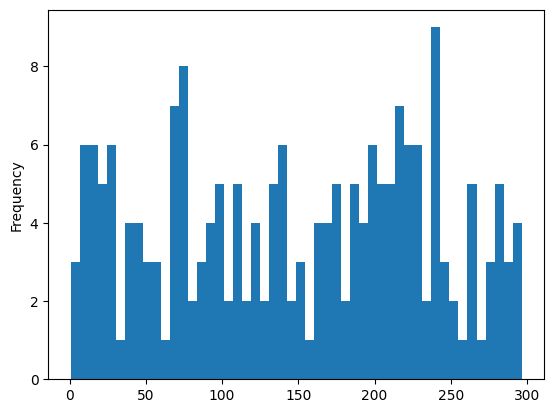

In [13]:
df['TV'].plot.hist(bins=50)

<Axes: xlabel='Radio', ylabel='Frequency'>

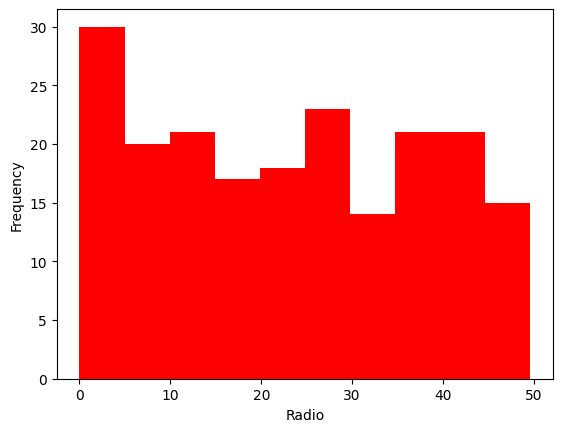

In [15]:
df['Radio'].plot.hist(bins=10, color="Red", xlabel="Radio")

<Axes: xlabel='Newspaper', ylabel='Frequency'>

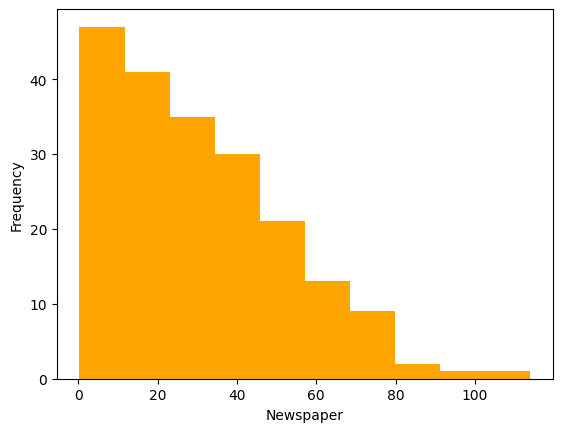

In [18]:
df['Newspaper'].plot.hist(bins=10, color="Orange", xlabel="Newspaper")

Low advertising cost in newspaper is a result of the Majority Sales

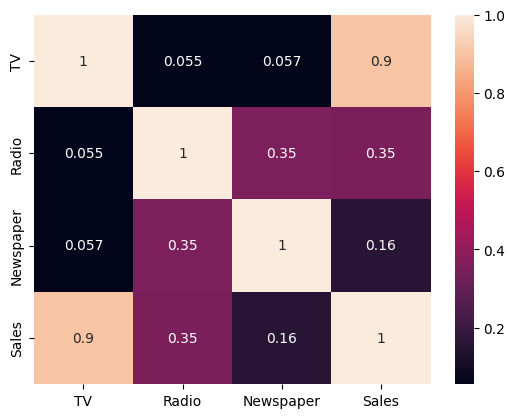

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Training our model using linear regression as it is corelated with only one variable TV

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['TV'], df['Sales'], test_size=0.2, random_state=32)

In [24]:
print(X_train)

156     93.9
154    187.8
153    171.3
197    177.0
185    205.0
       ...  
190     39.5
124    229.5
54     262.7
133    219.8
43     206.9
Name: TV, Length: 160, dtype: float64


In [25]:
print(y_train)

156    15.3
154    20.6
153    16.0
197    14.8
185    22.6
       ... 
190    10.8
124    19.7
54     20.2
133    19.6
43     17.9
Name: Sales, Length: 160, dtype: float64


In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [34]:
res=regressor.predict(X_test.values.reshape(-1, 1))
print(res)

[19.66824404 14.91968478 18.7016734  23.73683209 11.04778262  8.03005917
 12.48639939 21.06190403  8.13683151 10.23856069 20.57299912 19.35916622
 19.89302791 19.9098867   8.04691796 16.54374825 12.16046278 22.89389257
 21.43279742 14.14418043 15.11075107 12.1211256  20.42127    16.77415171
  8.4908661  12.95844552  7.49057788 23.15239402 13.59907955 14.35210551
 13.66651471 10.96910827 22.82645741 21.9835179  18.1846705  17.96550622
 11.30066448 19.57833049  7.11968449 12.45830141]


In [35]:
print(y_test)

122    16.6
186    10.3
167    17.2
101    23.8
29     10.5
75      8.7
144    12.3
28     18.9
121     7.0
182     8.7
27     20.9
181    17.2
39     21.5
23     20.5
2      12.0
173    16.7
107    12.0
17     24.4
109    19.8
118    15.9
26     15.0
46     10.6
21     17.5
160    16.4
44      8.5
143    10.4
56      5.5
188    20.9
79     11.0
73     11.0
164    11.9
18     11.3
102    19.8
131    17.7
96     16.7
141    19.2
115    12.6
174    16.5
130     1.6
34     11.9
Name: Sales, dtype: float64


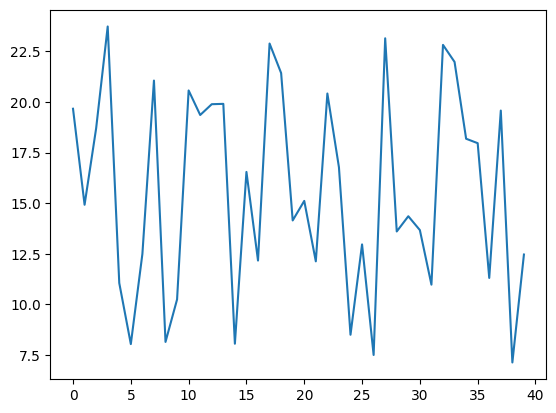

In [36]:
plt.plot(res)

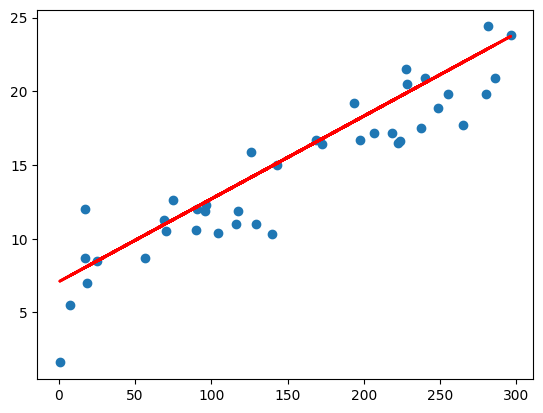

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, res, color='red', linewidth=2)
plt.show()

### Summarize the findings

Based on the evaluation metrics, the multiple linear regression model provides a better fit to the data and improved sales predictions compared to the simple linear regression model using only TV advertising costs.

This plot shows the actual sales values from the test set as blue dots, and the red line represents the sales predicted by our linear regression model based on the TV advertising costs. It helps visualize how well the model fits the data.

### Evaluate the model
You can use metrics like Mean Squared Error (MSE) and R-squared to quantitatively evaluate the performance of the model on the test set.

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, res)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, res)
print(f"R-squared: {r2}")

Mean Squared Error: 4.862696528200739
R-squared: 0.8145017428473121


### Consider a multiple linear regression model
Since 'Radio' and 'Newspaper' also have some correlation with 'Sales', you could try building a multiple linear regression model using all three features to see if it improves the sales prediction.

In [40]:
X_multi = df[['TV', 'Radio', 'Newspaper']]
y_multi = df['Sales']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=32)

# Train the multiple linear regression model
regressor_multi = LinearRegression()
regressor_multi.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = regressor_multi.predict(X_test_multi)

# Evaluate the multiple linear regression model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Multiple Linear Regression - Mean Squared Error: {mse_multi}")
print(f"Multiple Linear Regression - R-squared: {r2_multi}")

Multiple Linear Regression - Mean Squared Error: 2.8507386921278624
Multiple Linear Regression - R-squared: 0.8912523008744869
